In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch

SEED=42

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

## Preparing Dataset

In [4]:
df=pd.read_csv('/kaggle/input/news-summarization/data.csv')

In [7]:
df.head()

,Content,Summary,Dataset
0,New York police are concerned drones could bec...,Police have investigated criminals who have ri...,CNN/Daily Mail
1,By . Ryan Lipman . Perhaps Australian porn sta...,Porn star Angela White secretly filmed sex act...,CNN/Daily Mail
2,"This was, Sergio Garcia conceded, much like be...",American draws inspiration from fellow country...,CNN/Daily Mail
3,An Ebola outbreak that began in Guinea four mo...,World Health Organisation: 635 infections and ...,CNN/Daily Mail
4,By . Associated Press and Daily Mail Reporter ...,A sinkhole opened up at 5:15am this morning in...,CNN/Daily Mail


In [7]:
df.drop(columns=["Unnamed: 0","ID"],inplace=True)

In [6]:
df.sample(10)

,Content,Summary,Dataset
382092,Third in command: Abu Zubaydah was only behind...,Abu Zubaydah was captured in 2002 .\nGuantanam...,CNN/Daily Mail
324565,"PUBLISHED: . 15:55 EST, 2 January 2014 . | . U...",Department for International Development is fu...,CNN/Daily Mail
513742,"He had already flown from Kansas to Colorado, ...",US anti-abortion campaigner Troy Newman has be...,XSum
779596,Washington (CNN)Former New York Gov. Mario Cuo...,Gov. Mario Cuomo's most lasting legacy remains...,CNN/Daily Mail
631883,A tornado claimed the lives of four people in ...,A boy at River Valley Ranch Christian summer c...,CNN/Daily Mail
157704,The blast happened in the Sorkhrot district of...,At least 12 people have been killed and dozens...,XSum
741690,By . Jennifer Newton . A polar bear who surviv...,The female bear has been pictured with her sec...,CNN/Daily Mail
163889,By . Marco Pierre White . PUBLISHED: . 18:37 E...,Marco Pierre White celebrates the results of a...,CNN/Daily Mail
757621,A convicted sex offender groped a nine-year-ol...,Court told Peter Grant groped nine-year-old in...,CNN/Daily Mail
356655,Chelsea's highly rated midfielder Nathaniel Ch...,20-year-old Nathaniel Chalobah can play in mid...,CNN/Daily Mail


In [5]:
df_cnn=df[df['Dataset']=="CNN/Daily Mail"]
df_xsum=df[df['Dataset']=="XSum"]
df_other=df[df['Dataset']=="Multi-News"]

In [8]:
print(df_cnn.head())
print(df_cnn.shape)

                                             Content  \
0  New York police are concerned drones could bec...   
1  By . Ryan Lipman . Perhaps Australian porn sta...   
2  This was, Sergio Garcia conceded, much like be...   
3  An Ebola outbreak that began in Guinea four mo...   
4  By . Associated Press and Daily Mail Reporter ...   

                                             Summary         Dataset  
0  Police have investigated criminals who have ri...  CNN/Daily Mail  
1  Porn star Angela White secretly filmed sex act...  CNN/Daily Mail  
2  American draws inspiration from fellow country...  CNN/Daily Mail  
3  World Health Organisation: 635 infections and ...  CNN/Daily Mail  
4  A sinkhole opened up at 5:15am this morning in...  CNN/Daily Mail  
(587594, 3)


In [9]:
print(df_xsum.head())
print(df_xsum.shape)

                                              Content  \
23  They were taken on as volunteers and the servi...   
24  7 June 2016 Last updated at 20:23 BST\nTown be...   
30  Storms Desmond, Eva, Frank and Gertrude all ca...   
33  Russia's economic development ministry estimat...   
38  Some 80 locals, described by police as far-rig...   

                                              Summary Dataset  
23  An extra 60 counsellors were drafted in by the...    XSum  
24  Terry Butcher has been recalling Alan Brazil's...    XSum  
30  Borders councillors have been told the financi...    XSum  
33  The Russian government has warned the economy ...    XSum  
38  Residents have clashed with asylum seekers in ...    XSum  
(226711, 3)


In [10]:
print(df_other.head())
print(df_other.shape)

                                              Content  \
20  She did it – and this time, that’s a good thin...   
25  Once the negotiator arrives at the meeting poi...   
37  A British woman who fell from a cruise ship sa...   
41  Daiju Azuma. CC-BY-SA \n  \n Toxic chemicals a...   
51  CANBERRA, Australia (AP) — A large shark was k...   

                                              Summary     Dataset  
20  – Tomorrow looks to be a milestone day for Lin...  Multi-News  
25  – Brit Edwin Dyer was kidnapped in 2009 by al-...  Multi-News  
37  – A woman on a Norwegian Cruise Line ship got ...  Multi-News  
41  – Survival of the fittest in the depths of the...  Multi-News  
51  – The first shark has been killed off Western ...  Multi-News  
(56216, 3)


In [6]:
df_xsum=df_xsum.drop(columns=["Dataset"])

In [12]:
print(df_xsum.iloc[0,0])
print("\n")
print(df_xsum.iloc[0,1])

They were taken on as volunteers and the service has since decided to employ an extra four full-time counsellors.
Documents seen by the BBC show its welfare and counselling team was almost halved between 2008 and June 2017.
The London Fire Brigade said the mental health of staff was a "main priority".
At least 80 people died in the fire in North Kensington on 14 June.
More than 200 firefighters attended the tower block at the time, rescuing 65 people.
The extra four full-time counsellors would effectively return staffing levels to those in 2008.
The BBC understands there was the equivalent of 9.6 full-time counsellors working for the brigade in 2008. By the time of the fire, the number had been cut to 5.2.
The London Fire Brigade is using its reserve budget to pay for the extra counsellors.
But London Mayor Sadiq Khan has written to the government asking for it to provide extra funding for the fire service's staffing, as well as aerial appliances and improved breathing apparatus.
The f

## Data Preprocessing and Cleaning

In [13]:
df_xsum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226711 entries, 23 to 870515
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  226677 non-null  object
 1   Summary  226711 non-null  object
dtypes: object(2)
memory usage: 5.2+ MB


In [7]:
df_xsum=df_xsum.dropna().copy()

In [8]:
df_xsum.reset_index(drop=True,inplace=True)

In [12]:
df_xsum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226677 entries, 0 to 226676
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  226677 non-null  object
 1   Summary  226677 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [9]:
import html
import re

def preprocess_text(text):
    if not isinstance(text,str):
        text=str(text)
    text=" ".join(text.split())
    text=html.unescape(text)
    text=re.sub(r'[\x00-\x1F\x7F]','',text)

    return text

In [10]:
df_xsum["Content"]=df_xsum["Content"].apply(preprocess_text)
df_xsum["Summary"]=df_xsum["Summary"].apply(preprocess_text)

In [19]:
df_xsum.head()

,Content,Summary
0,They were taken on as volunteers and the servi...,An extra 60 counsellors were drafted in by the...
1,7 June 2016 Last updated at 20:23 BST Town bea...,Terry Butcher has been recalling Alan Brazil's...
2,"Storms Desmond, Eva, Frank and Gertrude all ca...",Borders councillors have been told the financi...
3,Russia's economic development ministry estimat...,The Russian government has warned the economy ...
4,"Some 80 locals, described by police as far-rig...",Residents have clashed with asylum seekers in ...


## Model Setup

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_temp,y_train,y_temp=train_test_split(df_xsum["Content"],df_xsum["Summary"],
                                               test_size=0.2,
                                              random_state=SEED)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,
                                               test_size=0.5,
                                              random_state=SEED)

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

model_name='facebook/bart-base'
tokenizer=BartTokenizer.from_pretrained(model_name)
model=BartForConditionalGeneration.from_pretrained(model_name)

In [22]:
tokenized_len=[]

def token_len(text):
    tokens=tokenizer.tokenize(text)
    tokenized_len.append(len(tokens))

In [23]:
df_xsum["Content"].apply(token_len)

0         None
1         None
2         None
3         None
4         None
          ... 
226672    None
226673    None
226674    None
226675    None
226676    None
Name: Content, Length: 226677, dtype: object

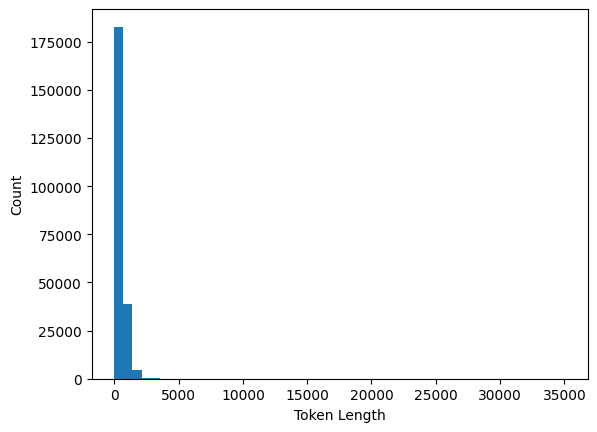

In [24]:
import matplotlib.pyplot as plt
plt.hist(tokenized_len, bins=50)
plt.xlabel("Token Length")
plt.ylabel("Count")
plt.show()


In [25]:
np.percentile(tokenized_len,90)

945.0

In [26]:
tokenized_len_output=[]

def token_len_out(text):
    tokens=tokenizer.tokenize(text)
    tokenized_len_output.append(len(tokens))

In [27]:
df_xsum["Summary"].apply(token_len_out)

0         None
1         None
2         None
3         None
4         None
          ... 
226672    None
226673    None
226674    None
226675    None
226676    None
Name: Summary, Length: 226677, dtype: object

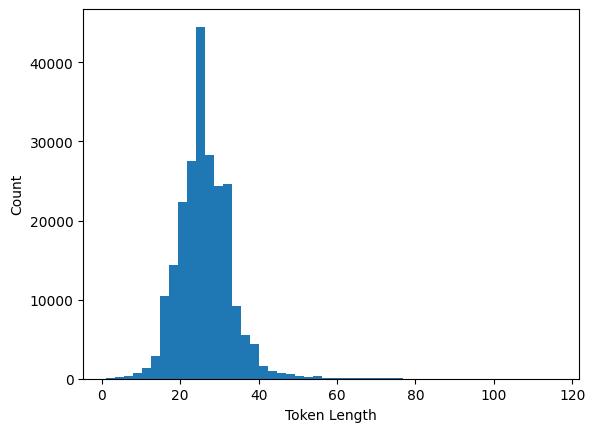

In [28]:
import matplotlib.pyplot as plt
plt.hist(tokenized_len_output,bins=50)
plt.xlabel("Token Length")
plt.ylabel("Count")
plt.show()


In [29]:
np.percentile(tokenized_len_output,90)

34.0

In [16]:
max_inp_len=768
max_out_len=64

def tokenize_fun(content , summary):
    model_inputs=tokenizer(
        content,
        max_length=max_inp_len,
        padding="longest",
        truncation=True,
        return_tensors="pt"
    )

    labels=tokenizer(
        summary,
        max_length=max_out_len,
        padding="longest",
        truncation=True,
        return_tensors="pt"
    )["input_ids"]

    labels[labels == tokenizer.pad_token_id] = -100
    model_inputs["labels"] = labels
    return model_inputs

In [17]:
train_encodings = tokenize_fun(list(x_train), list(y_train))
val_encodings   = tokenize_fun(list(x_val), list(y_val))
test_encodings  = tokenize_fun(list(x_test), list(y_test))

In [ ]:
!pip install -q peft

In [19]:
from torch.utils.data import Dataset,DataLoader

class XSumDataset(Dataset):
    def __init__(self,encodings):
        self.encodings=encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self,idx):
        item={}
        for key,val in self.encodings.items():
            item[key]=val[idx]

        return item

In [ ]:
train_dataset=XSumDataset(train_encodings)
test_dataset=XSumDataset(test_encodings)
val_dataset=XSumDataset(val_encodings)

## LoRA Initialization

In [21]:
from peft import LoraConfig,get_peft_model

target_modules = ["q_proj", "v_proj"]

lora_config = LoraConfig(
    r=8,                # rank of the low-rank matrices
    lora_alpha=16,      # scaling factor
    target_modules=target_modules,
    lora_dropout=0.1,
    bias="none",        # no bias updates
    task_type="SEQ_2_SEQ_LM"
)

model= get_peft_model(model, lora_config)

In [22]:

model.to(device)

PeftModelForSeq2SeqLM(
  (base_model): LoraModel(
    (model): BartForConditionalGeneration(
      (model): BartModel(
        (shared): BartScaledWordEmbedding(50265, 768, padding_idx=1)
        (encoder): BartEncoder(
          (embed_tokens): BartScaledWordEmbedding(50265, 768, padding_idx=1)
          (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
          (layers): ModuleList(
            (0-5): 6 x BartEncoderLayer(
              (self_attn): BartSdpaAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): lora.Linear(
                  (base_layer): Linear(in_features=768, out_features=768, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.1, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=768, out_features=8, bias=False)
                  )
                  (lora_B): ModuleDict(


## Model Training 

In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=3e-5,
    fp16=True,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=500,
    save_total_limit=2,
    report_to=[],
    log_level="info"
)



trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)


In [25]:
trainer.train()
trainer.evaluate()

***** Running training *****
  Num examples = 181,341
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 4
  Total optimization steps = 11,334
  Number of trainable parameters = 442,368
/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss
100,3.445200
200,2.955800
300,2.657800
400,2.593800
500,2.567800
600,2.547900
700,2.552800
800,2.507100
900,2.528300
1000,2.504800


Saving model checkpoint to ./results/checkpoint-500
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--bart-base/snapshots/aadd2ab0ae0c8268c7c9693540e9904811f36177/config.json
Model config BartConfig {
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartModel"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 12,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1

{'eval_loss': 2.046839475631714,
 'eval_runtime': 453.9902,
 'eval_samples_per_second': 49.931,
 'eval_steps_per_second': 12.483,
 'epoch': 1.0}

In [35]:

trainer.args.num_train_epochs = 1

# Continue training
trainer.train()
trainer.evaluate()

***** Running training *****
  Num examples = 181,341
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 4
  Total optimization steps = 11,334
  Number of trainable parameters = 442,368


Step,Training Loss
100,2.383100
200,2.404900
300,2.368600
400,2.387000
500,2.378100
600,2.390100
700,2.397000
800,2.371200
900,2.397000
1000,2.391900


Saving model checkpoint to ./results/checkpoint-500
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--bart-base/snapshots/aadd2ab0ae0c8268c7c9693540e9904811f36177/config.json
Model config BartConfig {
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartModel"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 12,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1

{'eval_loss': 2.027106523513794,
 'eval_runtime': 452.1814,
 'eval_samples_per_second': 50.13,
 'eval_steps_per_second': 12.533,
 'epoch': 1.0}

In [ ]:
model.save_pretrained("./epoch2/final1_model")
tokenizer.save_pretrained("./epoch2/final1_tokenizer")

In [ ]:
# Zip the saved model folder
!zip -r final1_model.zip ./epoch2/final1_model

# Zip the saved tokenizer folder (if you saved it somewhere else)
!zip -r final1_tokenizer.zip ./epoch2/final1_tokenizer

In [41]:
from torch.utils.data import DataLoader

model.eval()
test_loader=DataLoader(test_dataset,batch_size=4)

In [ ]:
import logging

# Stops the GenerationConfig from being printed
logging.getLogger("transformers.generation_utils").setLevel(logging.ERROR)
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)
logging.getLogger("transformers").setLevel(logging.ERROR)

In [48]:
from tqdm import tqdm

predictions=[]

for batch in tqdm(test_loader):
    input_ids=batch['input_ids'].to(device)
    attention_mask=batch['attention_mask'].to(device)

    with torch.no_grad():
        outputs=model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=60,
            num_beams=4,
            early_stopping=True
        )

    decoded_summaries=tokenizer.batch_decode(outputs,skip_special_tokens=True)
    predictions.extend(decoded_summaries)

100%|██████████| 5667/5667 [50:37<00:00,  1.87it/s]


In [49]:
references=list(y_test)

In [67]:
references[1]

'Two people have been found dead after a fire at a farmhouse in Sheffield.'

In [ ]:
predictions[1]

'Two people have been found dead after a fire in a building in Stannington.'

## Model Evaluation

In [ ]:
!pip install evaluate

In [ ]:
!pip install rouge_score

In [76]:
import evaluate

rouge = evaluate.load("rouge")

results = rouge.compute(predictions=predictions, references=references)

print("ROUGE-1 F1:", results["rouge1"])
print("ROUGE-2 F1:", results["rouge2"])
print("ROUGE-L F1:", results["rougeL"])


ROUGE-1 F1: 0.34386634374866587
ROUGE-2 F1: 0.13019998883160344
ROUGE-L F1: 0.2758558454426727


In [ ]:
!pip install bert-score

In [80]:
import bert_score

P,R,F1=bert_score.score(predictions,references,lang="en",rescale_with_baseline=True)

print("BertScore F1: ",F1.mean().item())

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

BertScore F1:  0.4049939215183258
